## Collaborative Filtering Based Recommender Systems using Matrix Factorization(Embeddings) & Neural Network in Keras.

## Please upvote/start if u like it.

####  Note::->
This notebook was run on Google Colab and some part of this thus contains code specific to the authorisation, other functionalities on the Google colab.

Thus you may skip that part while reading the notebook and may focus onto other specific parts.

## CONTENTS:-

#### 1 ) Exploring the Data

#### 2 ) Preaparing the Data

#### 3 ) Matrix Factorization

#### 4 ) Evaluating the Model Performance

#### 5 ) Using a Neural Network

## 1 ) Exploring the Data

## 1.1 ) Importing Various Modules

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


#TL pecific modules
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Redirecting output to ‘wget-log.3’.
(Reading database ... 19845 files and directories currently installed.)
Preparing to unpack google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.0-0ubuntu1) over (0.7.0-0ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.0-0ubuntu1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
··········


In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


## 1.2 ) Reading the CSV file

In [0]:
train=pd.read_csv(r'drive/Colab Notebooks/recommender-systems/movie-lens(small)/ratings.csv')

Note this file contains the ratings given by our set of users to different movies. In all it contains total 100K ratings.

In [0]:
df=train.copy()

In [6]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## 1.3 ) Exploring the dataset

In [7]:
df['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
len(df['userId'].unique())

671

Note that in total we have 671 unique users whose userid range from 1->671.

In [9]:
df['movieId'].unique()

array([  31, 1029, 1061, ...,  129, 4736, 6425])

In [10]:
len(df['movieId'].unique())

9066

Similarly we have 9066 unique movies, Also note that as provided each user has voted for atleast 20 movies.

#### Note that for 671 users and 9066 movies we can have a maximum of 671*9066 = 6083286 ratings. But note taht we have only 100004 ratings with us. Hence the utility matrix has only about 1.6 % of the total values. Hence we conclude that it is quite sparse.

In [11]:
df['userId'].isnull().sum()

0

In [12]:
df['rating'].isnull().sum()

0

In [13]:
df['movieId'].isnull().sum()

0

This confirms that none of the columns has any NULL or Nan value.

In [14]:
df['rating'].min() # minimum rating

0.5

In [15]:
df['rating'].max() # maximum rating

5.0

## 2 ) Preparing the data

## 2.1 ) Encoding the columns

In [0]:
df.userId = df.userId.astype('category').cat.codes.values
df.movieId = df.movieId.astype('category').cat.codes.values

In [17]:
df['userId'].value_counts(ascending=True)

0        20
208      20
248      20
324      20
437      20
309      20
603      20
398      20
667      20
336      20
497      20
220      20
13       20
288      20
34       20
295      20
650      20
75       20
484      20
582      20
443      20
539      20
483      20
447      20
656      20
444      20
318      20
637      20
355      21
63       21
       ... 
528     604
357     617
653     626
118     641
305     645
474     655
261     676
101     678
231     682
460     696
517     707
456     713
22      726
387     792
471     830
211     876
212     910
579     922
508     923
293     947
29     1011
310    1019
379    1063
467    1291
451    1340
72     1610
14     1700
623    1735
563    1868
546    2391
Name: userId, Length: 671, dtype: int64

In [18]:
df['movieId'].unique()

array([  30,  833,  859, ...,  115, 3712, 4629])

## 2.2 ) Creating the Utility Matrix

In [0]:
# creating utility matrix.
index=list(df['userId'].unique())
columns=list(df['movieId'].unique())
index=sorted(index)
columns=sorted(columns)
 
util_df=pd.pivot_table(data=df,values='rating',index='userId',columns='movieId')
# Nan implies that user has not rated the corressponding movie.

In [20]:
util_df

movieId,0,1,2,3,4,5,6,7,8,9,...,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### BREAKING IT DOWN--

1) This is the utility matrix; for each of the 671 users arranged rowwise; each column shows the rating of the movie given by a particular user.

2) Note that majority of the matrix is filled with 'Nan' which shows that majority of the movies are unrated by many users.

3) For each movie-user pair if the entry is NOT 'Nan' the vaue indicates the rating given bu user to that corressponding movie. 

4) For now I am gonna fill the 'Nan' value with value '0'. But note that this just is just indicative, a 0 implies NO RATING and doesn't mean that user has rated 0 to that movie.

In [21]:
util_df.fillna(0)  # 0 for movies not rated.

movieId,0,1,2,3,4,5,6,7,8,9,...,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065
userId,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.3 ) Creating Training and Validation Sets.

In [0]:
# x_train,x_test,y_train,y_test=train_test_split(df[['userId','movieId']],df[['rating']],test_size=0.20,random_state=42)
users = df.userId.unique()
movies = df.movieId.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

In [23]:
df['userId'] = df['userId'].apply(lambda x: userid2idx[x])
df['movieId'] = df['movieId'].apply(lambda x: movieid2idx[x])
split = np.random.rand(len(df)) < 0.8
train = df[split]
valid = df[~split]
print(train.shape , valid.shape)

(79956, 4) (20048, 4)


## 3 ) Matrix Factorization

#### Here comes the main part!!!      

1) Now we move on to the crux of the notebook ie Matrix Factorization. In matrix facorization, we basically break a matrix into usually 2 smaller matrices each with smaller dimensions. these matrices are oftem called 'Embeddings'.  We can have variants of Matrix Factorizartion-> 'Low Rank MF' , 'Non-Negaive MF' (NMF) and so on..  

2) Here I  have used the so called 'Low Rank Matrix Factorization'.  I have created  embeddings for both user as well as the item; movie in our case. The number of dimensions or the so called 'Latent Factors' in the embeddings is a hyperparameter to deal with in this implementation of Collaborative Filtering.                                                  

## 3.1 ) Creating the Embeddings ,Merging and Making the Model from Embeddings

In [0]:
n_movies=len(df['movieId'].unique())
n_users=len(df['userId'].unique())
n_latent_factors=64  # hyperparamter to deal with. 

In [0]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')

In [0]:
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
#user_embedding.shape

In [0]:
user_vec =Flatten(name='FlattenUsers')(user_embedding)
#user_vec.shape

In [0]:
movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
#movie_vec

In [2]:
sim=keras.layers.merge([user_vec,movie_vec],mode='dot',name='Simalarity-Dot-Product')
model =keras.models.Model([user_input, movie_input],sim)
# #model.summary()
# # A summary of the model is shown below-->

#### BREAKING IT DOWN--

1) First we need to create embeddings for both the user as well as the item or movie. For this I have used the Embedding layer from keras.

2) Specify the input expected to be embedded (Both in user and item embedding). The use a Embedding layer which expects the no of latent factors in the resulting embedding and also the no of users or items.

3) Then we take the 'Dot-Product' of both the embeddings using the 'merge' layer. Note that 'dot-product' is just a measure of simalrity and we can use any other mode like 'mulitply' or 'cosine simalarity' or 'concatenate' etc...

4) Lastly we make a Keras model from the specified details.


## 3.2 ) Compiling the Model

In [0]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

Note that the metrics used is 'Mean squared Error'. Our aim is to minimize the mse on the training set ie over the values which the user has rated (100004 ratings).

In [0]:
train.shape
batch_size=128
epochs=50

## 3.3 ) Fitting on Training set & Validating on Validation Set.

In [32]:
History = model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)

Train on 79956 samples, validate on 20048 samples
Epoch 1/50
79956/79956 [==============================] - 4s 50us/step - loss: 13.6788 - val_loss: 13.6669
Epoch 2/50
79956/79956 [==============================] - 3s 42us/step - loss: 13.6666 - val_loss: 13.6607
Epoch 3/50
79956/79956 [==============================] - 3s 42us/step - loss: 13.6400 - val_loss: 13.6304
Epoch 4/50
79956/79956 [==============================] - 3s 42us/step - loss: 13.5618 - val_loss: 13.5165
Epoch 5/50
79956/79956 [==============================] - 3s 42us/step - loss: 13.3402 - val_loss: 13.2011
Epoch 6/50
79956/79956 [==============================] - 3s 42us/step - loss: 12.8485 - val_loss: 12.5718
Epoch 7/50
79956/79956 [==============================] - 3s 41us/step - loss: 12.0127 - val_loss: 11.6044
Epoch 8/50
79956/79956 [==============================] - 3s 41us/step - loss: 10.8650 - val_loss: 10.3799
Epoch 9/50
79956/79956 [==============================] - 3s 41us/step - loss: 9.5193 - val_lo

## 4 ) Evaluating the Model Performance

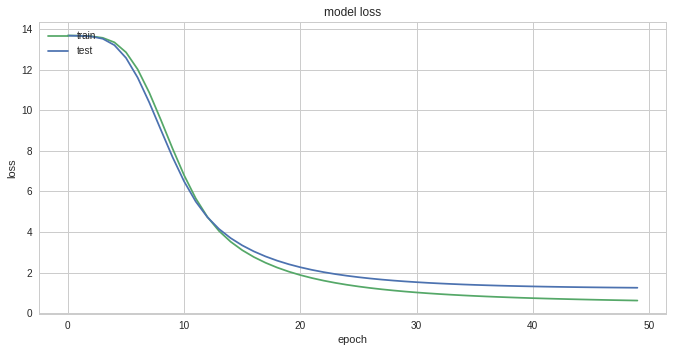

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

## 5 ) Using a Neural Network

#### Now let us focus on the other main thing!!! Using a NN to matrix factorization.

1) Note that this way is not much different from the previous approach.

2) The main difference is that we have used Fully Connected layers as well as the Dropout layers and the BatchNormalization layers.

3) The number of units and the number of layers etc.. are the hyperparametrs here as in a traditional neural network.



## 5.1 ) Creating the Embeddings

####  Note that I have used 50 latent factors as that seems to give reasonable performance. Furhter tuning and careful optimization can give even better results.

In [0]:
n_latent_factors=50
n_movies=len(df['movieId'].unique())
n_users=len(df['userId'].unique())

In [0]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

In [0]:
movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
movie_vec=Dropout(0.40)(movie_vec)

In [0]:
sim=keras.layers.merge([user_vec,movie_vec],mode='dot',name='Simalarity-Dot-Product')

## 5.2 ) Specifying the Model architecture

In [39]:
nn_inp=Dense(96,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
# nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(1,activation='relu')(nn_inp)
nn_model =keras.models.Model([user_input, movie_input],nn_inp)
nn_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        33550       user_input[0][0]                 
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        453300      movie_input[0][0]                
__________________________________________________________________________________________________
FlattenUse

#### Notice the summary of the model and also the architecture of the model which u can tune of course.

## 5.3 ) Compiling the Model

In [0]:
nn_model.compile(optimizer=Adam(lr=1e-3),loss='mse')

In [0]:
batch_size=128
epochs=20

## 5. 4) Fitting on Training set & Validating on Validation Set.

In [42]:
History = nn_model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)

Train on 79956 samples, validate on 20048 samples
Epoch 1/20
79956/79956 [==============================] - 5s 65us/step - loss: 2.8341 - val_loss: 1.1298
Epoch 2/20
79956/79956 [==============================] - 5s 58us/step - loss: 1.1904 - val_loss: 1.0071
Epoch 3/20
79956/79956 [==============================] - 5s 58us/step - loss: 0.9574 - val_loss: 0.9220
Epoch 4/20
79956/79956 [==============================] - 5s 58us/step - loss: 0.8230 - val_loss: 0.8928
Epoch 5/20
79956/79956 [==============================] - 5s 58us/step - loss: 0.7530 - val_loss: 0.8812
Epoch 6/20
79956/79956 [==============================] - 5s 57us/step - loss: 0.6955 - val_loss: 0.8712
Epoch 7/20
79956/79956 [==============================] - 5s 58us/step - loss: 0.6648 - val_loss: 0.8661
Epoch 8/20
79956/79956 [==============================] - 5s 58us/step - loss: 0.6322 - val_loss: 0.8620
Epoch 9/20
79956/79956 [==============================] - 5s 58us/step - loss: 0.6043 - val_loss: 0.8589
Epoch

#### Note that the validation loss is close to 0.84 which is quite decent. Also note that it has decrreased from 1.26 in the case of normal Matrix Factorization to this value here.

####  Similary playing with no of latent factors, other parameters in the model architecture can give to even better results!!!!!

## THE END.

## Please star/upvote if u liked it.